In [1]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix,accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

<Axes: xlabel='age', ylabel='chol'>

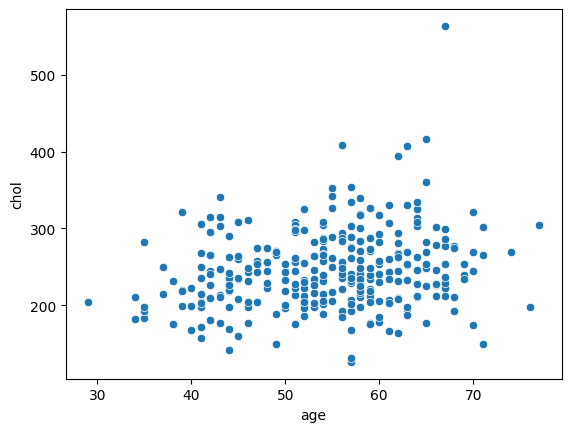

In [4]:
sns.scatterplot(x=df['age'],y=df['chol'])

<Axes: xlabel='cp', ylabel='age'>

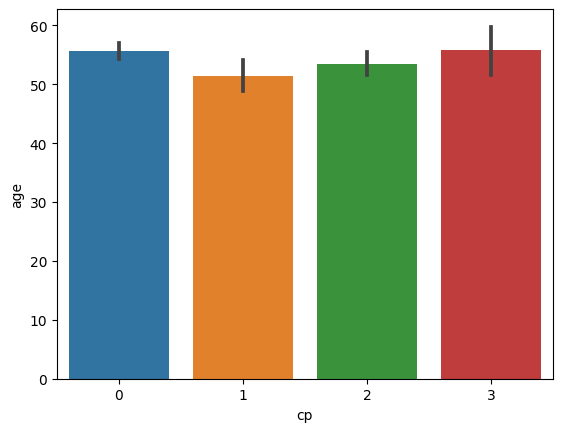

In [5]:
sns.barplot(x='cp',y='age',data=df)

In [6]:
df['output'].value_counts()

output
1    165
0    138
Name: count, dtype: int64

<Axes: xlabel='output', ylabel='cp'>

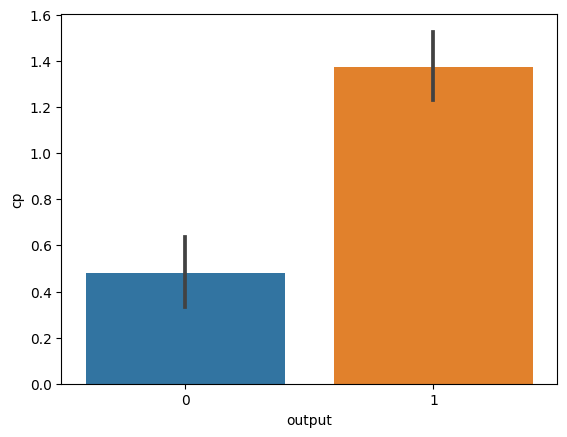

In [7]:
sns.barplot(x='output',y='cp',data=df)

In [8]:
x=df.drop(['output'],axis=1)
y=df['output']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

In [9]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

[[34 10]
 [ 3 44]]
0.8571428571428571


<Axes: >

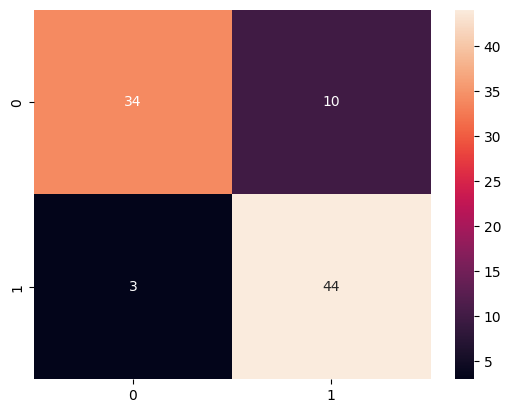

In [10]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

y_pred = lr.predict(x_test)
cm = confusion_matrix(y_test, y_pred)  
print(cm)
print(accuracy_score(y_test, y_pred)) 
sns.heatmap(cm, annot=True, fmt="d")

[[30 14]
 [ 6 41]]
0.7802197802197802


<Axes: >

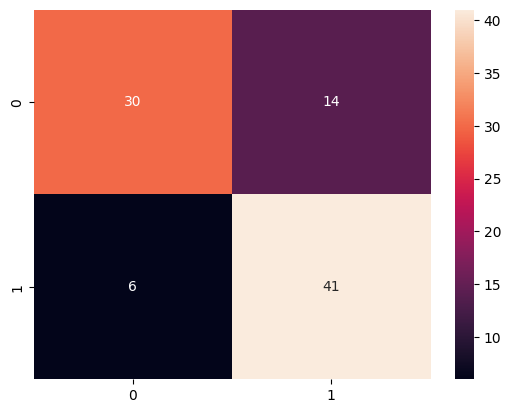

In [11]:
from sklearn.svm import SVC
sv=SVC(kernel='rbf',C=12) #had to choose a kernel and increase value of C to improve model accuracy.
sv.fit(x_train,y_train)

y_pred = sv.predict(x_test)
cm = confusion_matrix(y_test, y_pred)  
print(cm)
print(accuracy_score(y_test, y_pred)) 
sns.heatmap(cm,annot=True)

[[34 10]
 [ 5 42]]
0.8351648351648352


<Axes: >

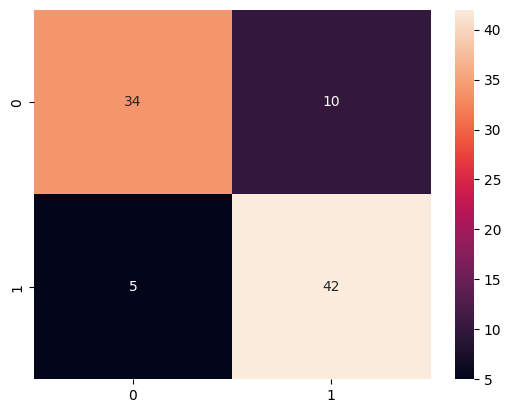

In [12]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

y_pred = rfc.predict(x_test)
cm = confusion_matrix(y_test, y_pred)  
print(cm)
print(accuracy_score(y_test, y_pred)) 
sns.heatmap(cm, annot=True, fmt="d")

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [21]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)

a=[[60,1,0,120,190,0,1,130,1,1.3,0,0,0]]
y_pred=knn.predict(a)
print(y_pred)


[1]
